# REG_SIMPLE

### Premier modele IA

In [1]:
# importation bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# lecture du fichier
reg_simple = pd.read_csv("reg_simple.csv")
reg_simple.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


### Création du modèle

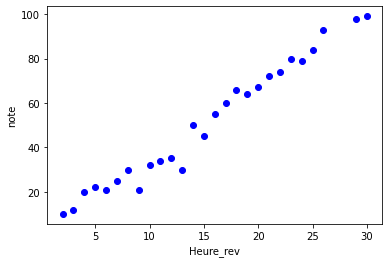

In [3]:
x=pd.DataFrame(reg_simple.heure_rev)
x.shape
y=pd.DataFrame(reg_simple.note)
y.shape
plt.scatter(x,y,c='blue')
plt.xlabel("Heure_rev")
plt.ylabel("note")

plt.show()


In [4]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(27, 2)


### Création du modèle (model(X,theta))

In [5]:
theta = np.random.randn(2, 1)
print(theta)

[[1.0205114 ]
 [0.53289327]]


### Différentes fonctions

In [6]:
def model(X, theta):
    return X.dot(theta)
 
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 

    for i in range(0, n_iterations):
         # mise a jour du parametre theta (formule du gradient descent)
        theta = theta - learning_rate * grad(X, y, theta)
        # on enregistre la valeur du Cout au tour i dans cost_history[i]
        cost_history[i] = cost_function(X, y, theta) 
    return theta, cost_history


### Evaluation du modèle

[[3.32958814]
 [0.6471269 ]]


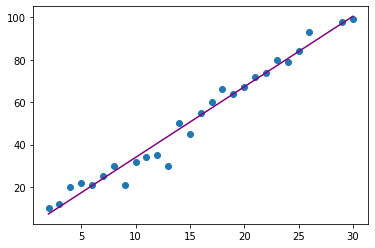

In [7]:
n_iterations = 100
learning_rate = 0.001
 
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

# voici les parametres du modele une fois que la machine a été entrainée
print(theta_final) 

# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
 
# Affiche les résultats de prédictions (en violet) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='purple')
plt.show()

### Courbe de la fonction coût

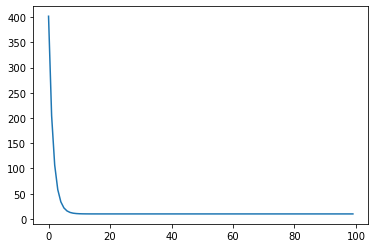

In [8]:
# visualisation dela descente de gradient
plt.plot(range(n_iterations), cost_history)
plt.show()

## Régression linéaire multiples

In [9]:
# lecture du fichier
bhp = pd.read_csv("boston_house_prices.csv")
bhp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
#Transformation de notre jeu de données en DataFrame
x=pd.DataFrame(np.c_[bhp['LSTAT'],bhp['RM'],bhp['TAX'],bhp['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])
Y = bhp['MEDV']

In [11]:
X = np.hstack((x, np.ones((x.shape[0], 1))))
X.shape
print(X)

[[  4.98    6.575 296.     15.3     1.   ]
 [  9.14    6.421 242.     17.8     1.   ]
 [  4.03    7.185 242.     17.8     1.   ]
 ...
 [  5.64    6.976 273.     21.      1.   ]
 [  6.48    6.794 273.     21.      1.   ]
 [  7.88    6.03  273.     21.      1.   ]]


<AxesSubplot:>

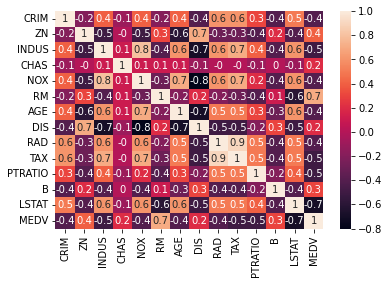

In [12]:
#etude de la correlation
matrice_corr = bhp.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

## fonction mean_squared_error de sklearn

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

(404, 5)
(102, 5)
(404,)
(102,)


LinearRegression()

In [14]:
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print("La performance du modèle sur la base d'apprentissage")
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage
L'erreur quadratique moyenne est 5.303422189850912
le score R2 est 0.6725758894106004


La performance du modèle sur la base de test
L'erreur quadratique moyenne est 4.897434387599182
le score R2 est 0.6936559148531631


## Regression linéaire poynômiale

In [15]:
# lecture du fichier
position_salarie = pd.read_csv("Position_Salaries.csv")
position_salarie.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


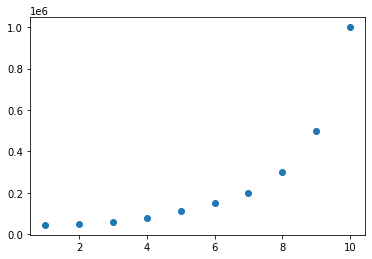

In [16]:
x=np.array(position_salarie["Level"])
Y=np.array(position_salarie["Salary"])
plt.scatter(x, Y)
Y = Y.reshape(Y.shape[0], 1)

In [20]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) 
X.shape 
theta = np.random.randn(3, 1)
theta.shape 

(3, 1)

In [25]:
def model(X, theta):
    return X.dot(theta)

In [29]:
model(X, theta)[:3]

ValueError: shapes (30,) and (3,1) not aligned: 30 (dim 0) != 3 (dim 0)